In [4]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

In [5]:
df1=pd.read_csv('final_project.generation.csv')
df2=pd.read_csv('final_project.weathers.csv')


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [7]:
df2.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [8]:
df1['time']=pd.to_datetime(df1['time'],utc=True)
df2['dt_iso'] = pd.to_datetime(df2['dt_iso'],utc=True)
df2=df2.drop(['pressure','humidity','wind_speed','weather_description','temp_min','temp_max','wind_deg','rain_1h','rain_3h','snow_3h','clouds_all','weather_id','weather_icon'],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   dt_iso        178396 non-null  datetime64[ns, UTC]
 1   city_name     178396 non-null  object             
 2   temp          178396 non-null  float64            
 3   weather_main  178396 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 5.4+ MB


In [9]:
df = pd.merge(df1, df2, left_on='time', right_on='dt_iso', how='inner')

In [10]:
df.columns = df.columns.str.strip()
df.drop(columns=['generation biomass','generation fossil oil','generation fossil gas','dt_iso','price day ahead','generation other renewable','forecast wind onshore day ahead','generation fossil brown coal/lignite','total load actual','generation fossil hard coal','generation waste','generation other','generation fossil peat','generation hydro pumped storage consumption','generation wind onshore','generation hydro run-of-river and poundage','generation hydro water reservoir','generation fossil coal-derived gas','forecast wind offshore eday ahead','generation wind offshore','forecast solar day ahead','generation geothermal','generation marine','generation fossil oil shale','generation hydro pumped storage aggregated'],inplace=True)
#df.drop(columns=['generation fossil coal-derived gas','generation other renewable','generation fossil oil shale','generation fossil peat','generation hydro pumped storage aggregated','generation geothermal','generation wind offshore','generation wind onshore','forecast wind offshore eday ahead'],inplace=True)
print(df.head())

                       time  generation nuclear  generation solar  \
0 2014-12-31 23:00:00+00:00              7096.0              49.0   
1 2014-12-31 23:00:00+00:00              7096.0              49.0   
2 2014-12-31 23:00:00+00:00              7096.0              49.0   
3 2014-12-31 23:00:00+00:00              7096.0              49.0   
4 2014-12-31 23:00:00+00:00              7096.0              49.0   

   total load forecast  price actual   city_name        temp weather_main  
0                26118         65.41    Valencia  270.475000        clear  
1                26118         65.41      Madrid  267.325000        clear  
2                26118         65.41      Bilbao  269.657312        clear  
3                26118         65.41   Barcelona  281.625000        clear  
4                26118         65.41     Seville  273.375000        clear  


In [11]:
uc=df['city_name'].unique()
print(uc)

['Valencia' 'Madrid' 'Bilbao' ' Barcelona' 'Seville']


In [12]:
mausam=df['weather_main'].unique()
print(mausam)

['clear' 'clouds' 'rain' 'snow' 'fog' 'mist' 'haze' 'dust' 'drizzle'
 'thunderstorm' 'smoke' 'squall']


In [13]:
df['time'] = pd.to_datetime(df['time'],utc=True)


In [14]:
# Extract features
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['month'] = df['time'].dt.month

In [15]:
df = df.drop(columns=['time'])

print(df)

        generation nuclear  generation solar  total load forecast  \
0                   7096.0              49.0                26118   
1                   7096.0              49.0                26118   
2                   7096.0              49.0                26118   
3                   7096.0              49.0                26118   
4                   7096.0              49.0                26118   
...                    ...               ...                  ...   
178391              6075.0              31.0                24424   
178392              6075.0              31.0                24424   
178393              6075.0              31.0                24424   
178394              6075.0              31.0                24424   
178395              6075.0              31.0                24424   

        price actual   city_name        temp weather_main  hour  day_of_week  \
0              65.41    Valencia  270.475000        clear    23            2   
1          

In [16]:
df.head()

,generation nuclear,generation solar,total load forecast,price actual,city_name,temp,weather_main,hour,day_of_week,month
0,7096.0,49.0,26118,65.41,Valencia,270.475000,clear,23,2,12
1,7096.0,49.0,26118,65.41,Madrid,267.325000,clear,23,2,12
2,7096.0,49.0,26118,65.41,Bilbao,269.657312,clear,23,2,12
3,7096.0,49.0,26118,65.41,Barcelona,281.625000,clear,23,2,12
4,7096.0,49.0,26118,65.41,Seville,273.375000,clear,23,2,12


In [17]:
x = df[[ 'day_of_week','hour','month','total load forecast','temp','weather_main','city_name','generation solar','generation nuclear']]  
y = df['price actual']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import MissingIndicator,SimpleImputer

transformer=ColumnTransformer(transformers=[('onehot',OneHotEncoder(sparse_output=False,drop='first'),['city_name','weather_main'])],remainder='passthrough')
x_train=transformer.fit_transform(x_train)
x_test=transformer.transform(x_test)

In [20]:
x_train_df = pd.DataFrame(x_train, columns=['day_of_week','hour','month','total load forecast','generation solar','generation nuclear','temp','clear','clouds','rain','snow','fog','mist','haze','dust','drizzle','thunderstrom','smoke','squall','Valencia','Madrid','Bilbao'])
print(x_train_df.columns)

Index(['day_of_week', 'hour', 'month', 'total load forecast',
       'generation solar', 'generation nuclear', 'temp', 'clear', 'clouds',
       'rain', 'snow', 'fog', 'mist', 'haze', 'dust', 'drizzle',
       'thunderstrom', 'smoke', 'squall', 'Valencia', 'Madrid', 'Bilbao'],
      dtype='object')


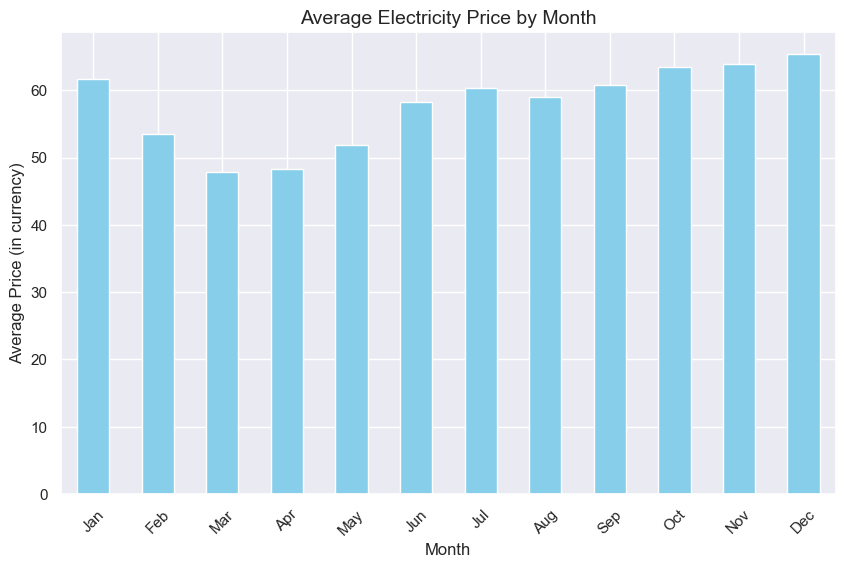

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# You can group by 'month' directly if the year is already part of the data or if it's implicit

# Group by 'month' and calculate the average price
monthly_avg_price = df.groupby('month')['price actual'].mean()

# Plotting
plt.figure(figsize=(10, 6))
monthly_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Electricity Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price (in currency)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()


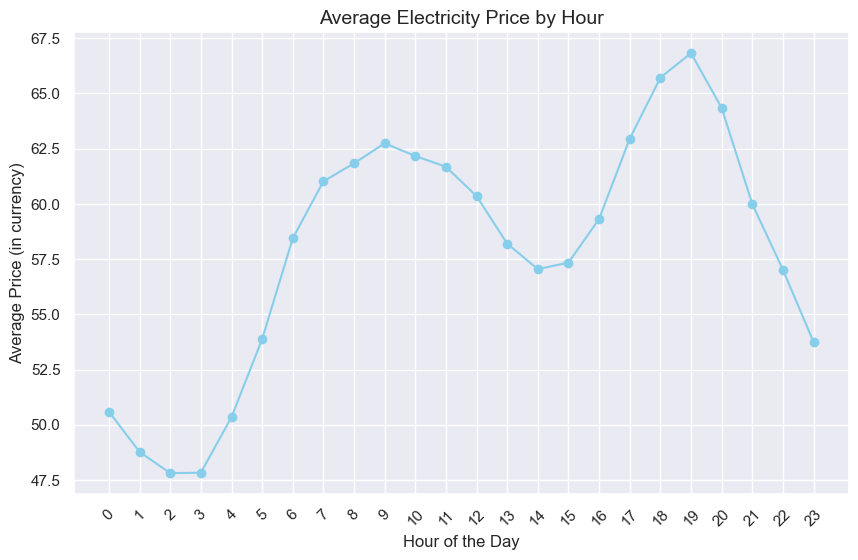

In [22]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
# Group by 'hour' and calculate the average price
hourly_avg_price = df.groupby('hour')['price actual'].mean()

# Plotting
plt.figure(figsize=(10, 6))
hourly_avg_price.plot(kind='line', color='skyblue', marker='o')
plt.title('Average Electricity Price by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Price (in currency)', fontsize=12)
plt.xticks(range(0, 24), rotation=45)
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Display Actual vs Predicted Prices
results = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': y_pred})
print(results)

Mean Squared Error: 3.554074304084923
R² Score: 0.9822488406942252
       Actual Price  Predicted Price
0             43.82          49.0140
1             60.85          60.8655
2             66.91          66.5644
3             79.78          79.2614
4             75.84          75.8258
...             ...              ...
35675         64.43          62.8584
35676         88.42          88.0943
35677         61.77          59.4623
35678         53.54          54.1083
35679         62.49          62.1614

[35680 rows x 2 columns]


In [25]:
import joblib

# Assuming `model` is your trained machine learning model
joblib.dump(model, "final_project.pkl")
print("Model saved as final_project.pkl")

Model saved as final_project.pkl


In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the trained model and column transformer
import joblib
model = joblib.load('final_project.pkl')  # Assuming you've saved your model earlier
transformer = joblib.load('column_transformer.pkl')  # Assuming you've saved the transformer

# Function to get input from the user
def get_user_input():
    # User inputs (you can customize this according to your need)
    day_of_week = int(input("Enter the day of the week (0=Monday, 6=Sunday): "))
    hour = int(input("Enter the hour of the day (0-23): "))
    month = int(input("Enter the month (1-12): "))
    load_forecast = float(input("Enter the total load forecast (in MW): "))
    temp = float(input("Enter the temperature (in °C): "))
    weather_main = input("Enter the weather condition (e.g., 'clear', 'clouds', 'rain'): ")
    city_name = input("Enter the city name (e.g., 'Valencia', 'Madrid', 'Bilbao'): ")
    generation_solar = float(input("Enter the solar generation (in MW): "))
    generation_nuclear = float(input("Enter the nuclear generation (in MW): "))
    
    # Creating a DataFrame with user input
    user_input_df = pd.DataFrame({
        'day_of_week': [day_of_week],
        'hour': [hour],
        'month': [month],
        'total load forecast': [load_forecast],
        'temp': [temp],
        'weather_main': [weather_main],
        'city_name': [city_name],
        'generation solar': [generation_solar],
        'generation nuclear': [generation_nuclear]
    })
    
    return user_input_df

# Preprocess the user input to match the format used for training
def preprocess_input(user_input_df):
    # Transform using the same transformer as for training data
    user_input_transformed = transformer.transform(user_input_df)
    
    return user_input_transformed

# Predict the price using the trained model
def predict_price():
    # Get user input
    user_input_df = get_user_input()

    # Preprocess the input data
    processed_input = preprocess_input(user_input_df)
    
    # Make prediction
    predicted_price = model.predict(processed_input)
    
    print(f"Predicted electricity price: {predicted_price[0]}")

# Call the function to make a prediction
predict_price()

Enter the day of the week (0=Monday, 6=Sunday):  2
Enter the hour of the day (0-23):  12
Enter the month (1-12):  6
Enter the total load forecast (in MW):  456
Enter the temperature (in °C):  34
Enter the weather condition (e.g., 'clear', 'clouds', 'rain'):  clouds
Enter the city name (e.g., 'Valencia', 'Madrid', 'Bilbao'):  Madrid
Enter the solar generation (in MW):  4567
Enter the nuclear generation (in MW):  4567


Predicted electricity price: 62.81079999999999


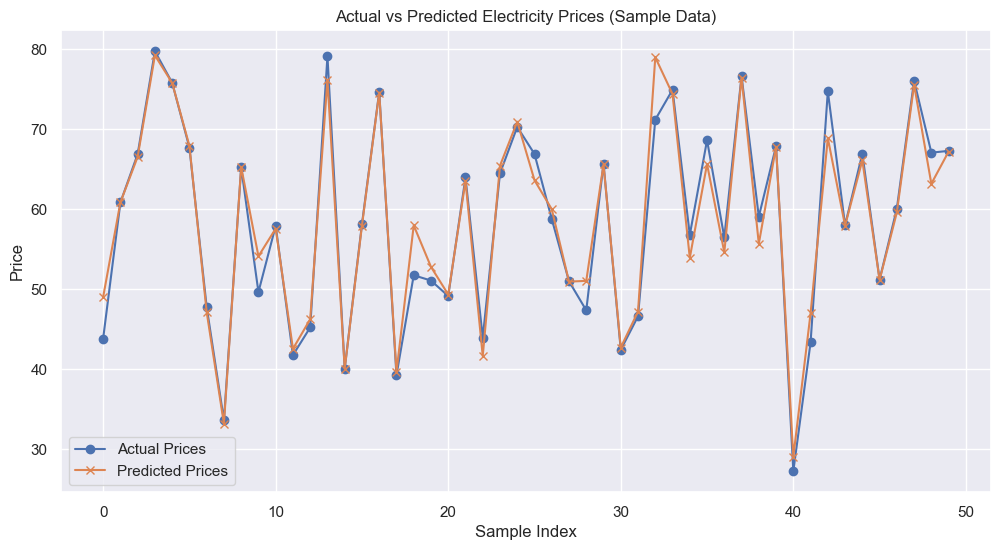

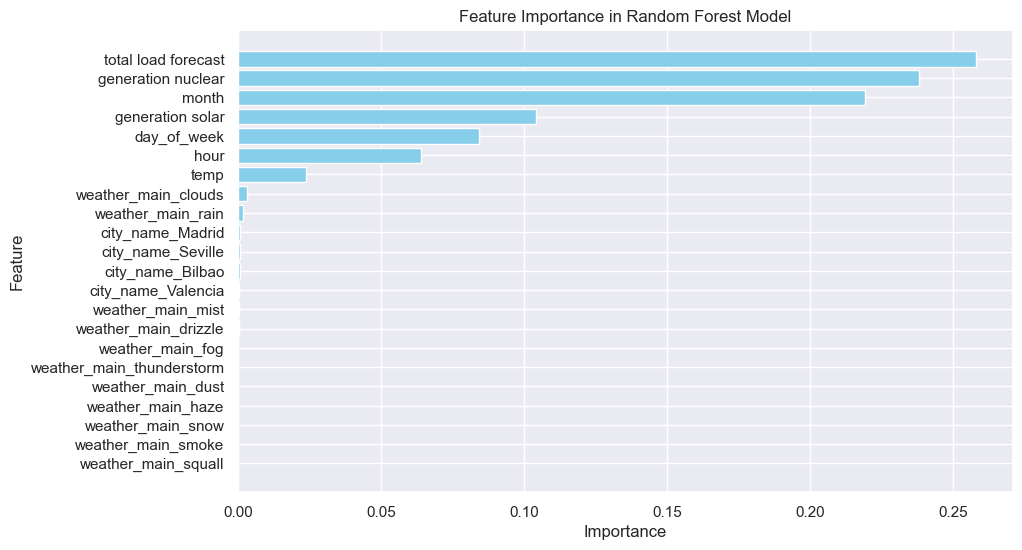

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Line graph: Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual Prices', marker='o')  # Plot the first 50 actual prices
plt.plot(y_pred[:50], label='Predicted Prices', marker='x')  # Plot the first 50 predicted prices
plt.title('Actual vs Predicted Electricity Prices (Sample Data)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance Bar Chart
# Extracting feature importance from the RandomForestRegressor
feature_importances = model.feature_importances_

# Matching feature names with transformed features
onehot_features = transformer.named_transformers_['onehot'].get_feature_names_out(['city_name', 'weather_main'])
final_feature_names = np.concatenate((onehot_features, ['day_of_week', 'hour', 'month', 
                                                         'total load forecast', 'temp', 
                                                         'generation solar', 'generation nuclear']))

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(True, axis='x')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Save the trained model
import joblib 
joblib.dump(model, "Untitled6.pkl")

print("Model saved as Untitled6.pkl")



Model saved as Untitled6.pkl


In [29]:
import pickle

# Assuming your trained model is named `model`
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model, f)
